# BIOS512 Assignment #4

🌬 For this assignment we are going to work with [Canada wind turbine](https://github.com/rfordatascience/tidytuesday/blob/master/data/2020/2020-10-27/readme.md) data from TidyTuesday. 💨

Use `read_csv` to load the data from the TidyTuesday GitHub repository. The project URL is can be found at [https://github.com/rfordatascience/tidytuesday/blob/master/data/2020/2020-10-27/](https://github.com/rfordatascience/tidytuesday/blob/master/data/2020/2020-10-27/).

In [1]:
library('tidyverse')

Warning message:
“Failed to locate timezone database”
── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.3     ✔ readr     2.1.4
✔ forcats   1.0.0     ✔ stringr   1.5.0
✔ ggplot2   3.4.3     ✔ tibble    3.2.1
✔ lubridate 1.9.2     ✔ tidyr     1.3.0
✔ purrr     1.0.2     
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors


In [2]:
turbine_data= read_csv("https://raw.githubusercontent.com/rfordatascience/tidytuesday/master/data/2020/2020-10-27/wind-turbine.csv")
turbine_data|>head()

Rows: 6698 Columns: 15
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (8): province_territory, project_name, turbine_identifier, turbine_numbe...
dbl (7): objectid, total_project_capacity_mw, turbine_rated_capacity_k_w, ro...

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


objectid,province_territory,project_name,total_project_capacity_mw,turbine_identifier,turbine_number_in_project,turbine_rated_capacity_k_w,rotor_diameter_m,hub_height_m,manufacturer,model,commissioning_date,latitude,longitude,notes
<dbl>,<chr>,<chr>,<dbl>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<chr>
1,Alberta,Optimist Wind Energy,0.90,OWE1,1/2,150,23,30,Bonus,AN 150/30,1993,49.52535,-114.0548,NA
2,Alberta,Castle River Wind Farm,44.00,CRW1,1/60,600,44,40,Vestas,V44/600,1997,49.51264,-114.0357,NA
3,Alberta,Waterton Wind Turbines,3.78,WWT1,1/6,600,44,50,Vestas,V44/600,1998,49.23307,-113.6549,NA
4,Alberta,Waterton Wind Turbines,3.78,WWT2,2/6,600,44,50,Vestas,V44/600,1998,49.23303,-113.6302,NA
5,Alberta,Waterton Wind Turbines,3.78,WWT3,3/6,600,44,50,Vestas,V44/600,1998,49.21755,-113.6802,NA
6,Alberta,Waterton Wind Turbines,3.78,WWT4,4/6,660,47,50,Vestas,V47/660,2000,49.21773,-113.6579,NA


Each row in the table represents a single turbine.

Make a bar chart 📊 **sorted by frequency** of turbine count per province territory. (Hint: `fct_infreq` will sort your factor levels by frequency for subsequent plotting)

In [3]:
turbine_data$province_territory= fct_infreq(turbine_data$province_territory)

In [103]:
turbine_data|>
group_by(province_territory)|>
summarize(turbine_count=n())|>
ungroup()|>
arrange(province_territory)|>
mutate(province_territory=fct_infreq(province_territory)|>
fct_rev())


    


province_territory,turbine_count
<fct>,<int>
Ontario,2663
Quebec,1991
Alberta,900
Nova Scotia,310
British Columbia,292
Saskatchewan,153
Manitoba,133
New Brunswick,119
Prince Edward Island,104


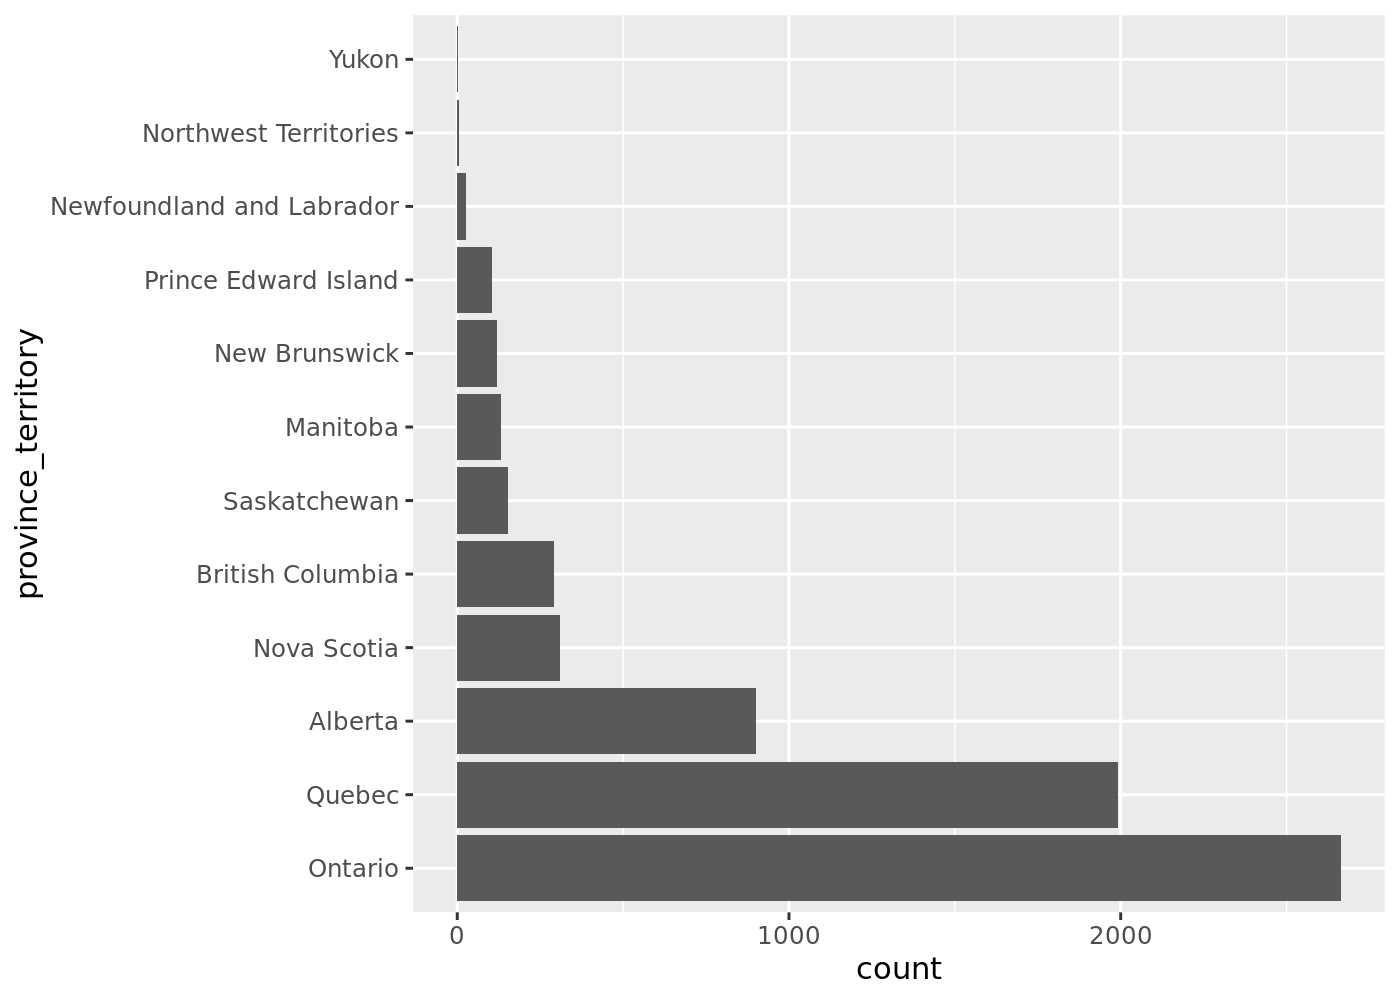

In [105]:
options(repr.plot.res=200,repr.plot.width=7,repr.plot.height=5)
p=ggplot(turbine_data,aes(y=province_territory))+geom_bar()
p


Make a bar chart **sorted by frequency** of turbine count per manufacturer. **Group the low frequency manufacturers into an `Other` category**.

**Bonus:** Can you force the `Other` category to be the last bar? 

In [95]:
turbine_data$manufacturer= fct_infreq(turbine_data$manufacturer)

In [98]:
turbine_data$manufacturer= fct_other(turbine_data$manufacturer, keep = c("Vestas", "GE", "Siemens", "Enercon", "Senvion", "NEG Micon", "Acciona Wind Power"))

In [99]:
turbine_data|>
group_by(manufacturer)|>
summarize(turbine_count=n())|>
ungroup()|>
arrange(manufacturer)|>
mutate(manufacturer=fct_infreq(manufacturer)|>
       fct_lump(n=7)|>
       fct_relevel('Other', after= Inf)|>
fct_rev())




manufacturer,turbine_count
<fct>,<int>
Vestas,1834
GE,1725
Siemens,1248
Enercon,960
Senvion,643
NEG Micon,132
Acciona Wind Power,40
Other,116


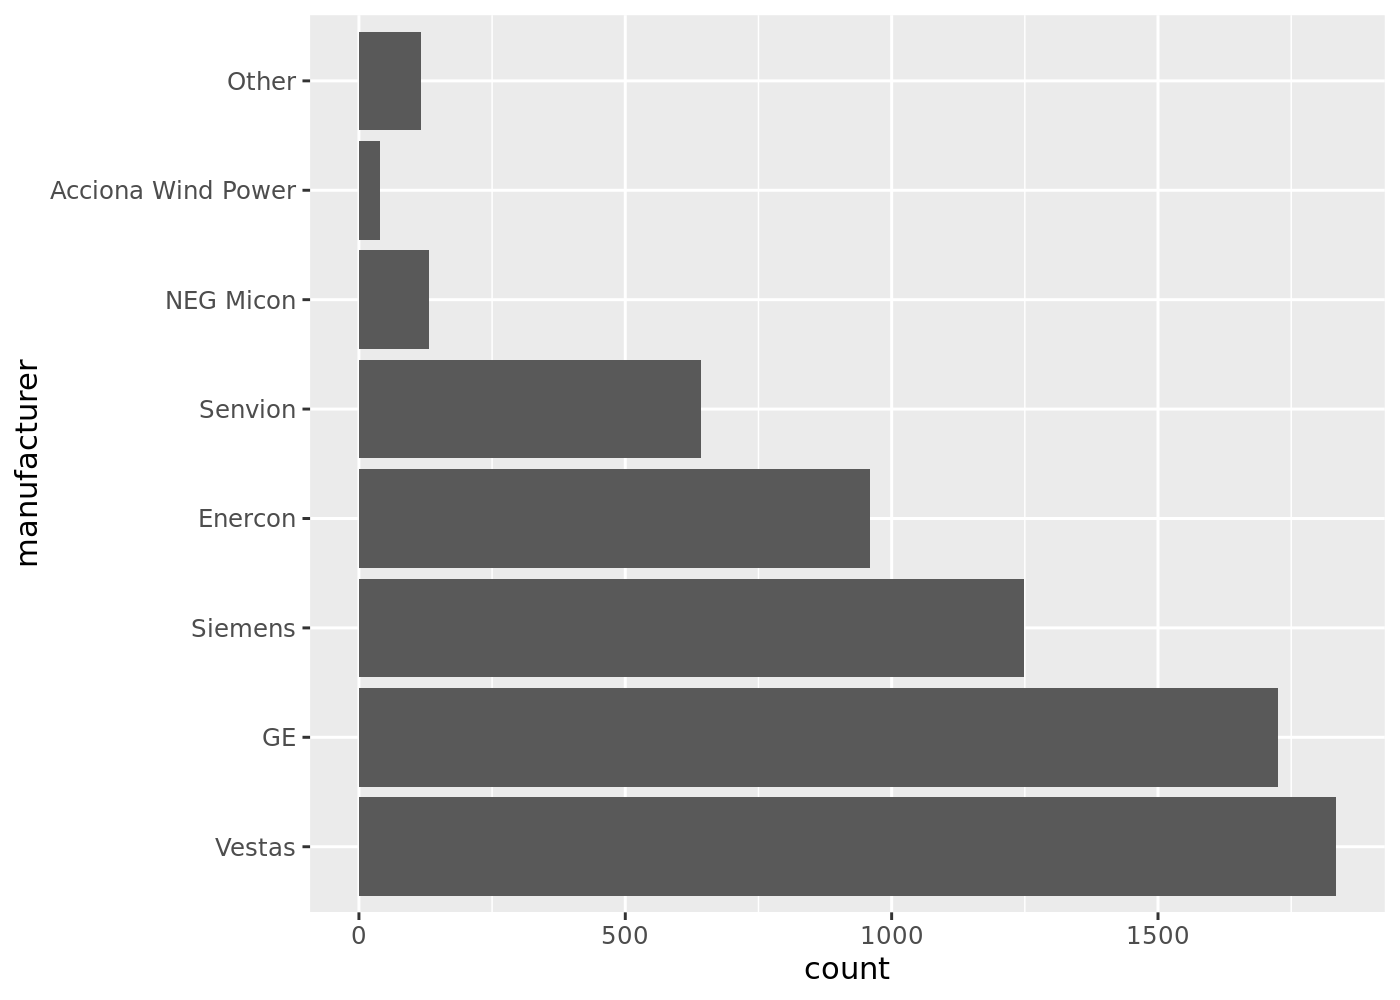

In [100]:
options(repr.plot.res=200,repr.plot.width=7,repr.plot.height=5)
p=ggplot(turbine_data,aes(y=manufacturer))+geom_bar()
p